Nome: Giuliana Prado Peixoto


Projeto 0 - Perceptron

Implementar o Perceptron para resolver o problema de uma porta lógica (AND, OR)

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
## Lógica da porta AND

entradas = np.array([[0,0],[0,1],[1,0],[1,1]])
saidas = np.array([0,0,0,1])

taxa_aprend = 0.2
epocas = 5

pesos = np.random.rand(2)
bias = np.random.rand()
historico = []

In [94]:
def step_function(x):
  if x >= 0:
    return 1
  else:
    return 0

In [95]:
## Treinando o perceptron

for epoca in range(epocas):
  for i in range(len(entradas)):
    x = entradas[i]
    y = saidas[i]
    z = np.dot(x,pesos) + bias # faz o produto escalar

    y_pred = step_function(z)

    erro = y - y_pred

    pesos += taxa_aprend * erro * x
    bias += taxa_aprend * erro

  historico.append((pesos.copy(), bias))


In [96]:
## MOnta o gráfico da fronteira de separação

def grafico_separacao(a):
  x_min = -0.2
  x_max = 1.2

  y_min = -0.2
  y_max = 1.2

  x_vals = np.linspace(x_min, x_max, 100)

  y_vals = -(pesos[0] * x_vals + bias) / pesos[1]

  plt.figure(figsize=(8,6))
  for i in range(len(entradas)):
      cor = 'ro' if saidas[i] == 0 else 'go'
      plt.plot(entradas[i][0], entradas[i][1], cor)

  plt.plot(x_vals, y_vals, 'b--', label='Fronteira de separação')
  plt.xlabel("x1")
  plt.ylabel("x2")
  if a == 1:
    plt.title("Porta AND com Perceptron")
    plt.legend()
    plt.grid(True)
    plt.show()
  else:
    plt.title("Porta OR com Perceptron")
    plt.legend()
    plt.grid(True)
    plt.show()


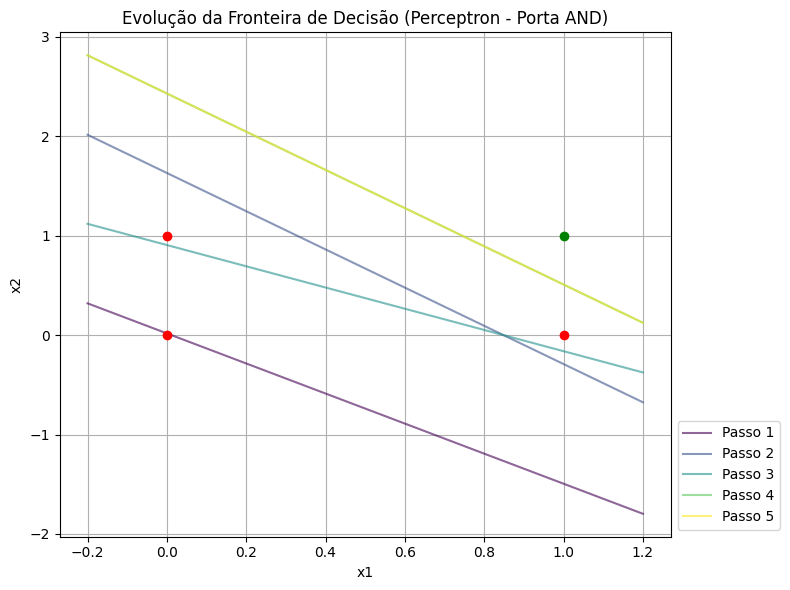

In [97]:
# Plot final
plt.figure(figsize=(8,6))
cores = plt.cm.viridis(np.linspace(0, 1, len(historico)))  # paleta de cores
x_vals = np.linspace(-0.2, 1.2, 100)

# Desenha cada reta do histórico
for i, (w, b) in enumerate(historico):
    if w[1] != 0:  # evitar divisão por zero
        y_vals = -(w[0] * x_vals + b) / w[1]
        plt.plot(x_vals, y_vals, color=cores[i], alpha=0.6, label=f"Passo {i+1}")

# Pontos de dados
for i in range(len(entradas)):
    cor = 'ro' if saidas[i] == 0 else 'go'
    plt.plot(entradas[i][0], entradas[i][1], cor)

plt.title("Evolução da Fronteira de Decisão (Perceptron - Porta AND)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

Pesos finais: [0.48061454 0.25001662]
Bias final: -0.6078660027666135


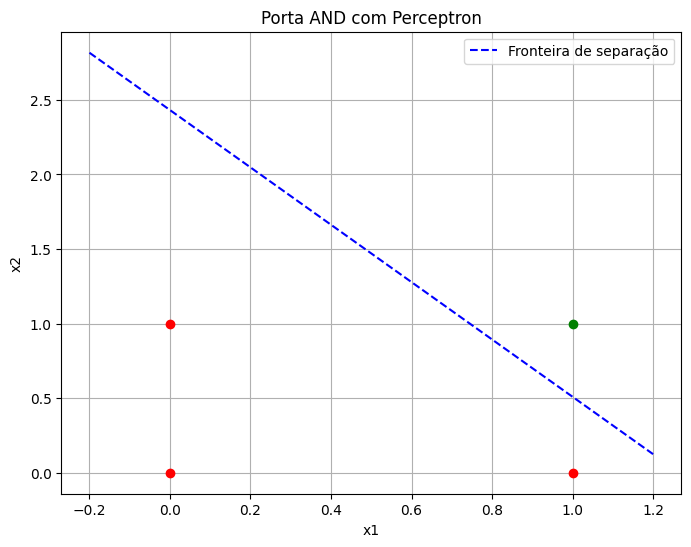

In [98]:
## Prints

print("Pesos finais:", pesos)
print("Bias final:", bias)

grafico_separacao(1)

In [99]:
## Agora com a porta OR

saidas = np.array([0, 1, 1, 1])

taxa_aprendizado = 0.2
epocas = 5

# Inicializa pesos e bias aleatórios
pesos = np.random.rand(2)
bias = np.random.rand()

# Guarda pesos e bias ao final de cada época
historico_epocas = []


In [100]:
for epoca in range(epocas):
    for i in range(len(entradas)):
        x = entradas[i]
        y = saidas[i]
        z = np.dot(x, pesos) + bias
        y_pred = step_function(z)
        erro = y - y_pred
        pesos += taxa_aprendizado * erro * x
        bias += taxa_aprendizado * erro


    historico_epocas.append((pesos.copy(), bias))


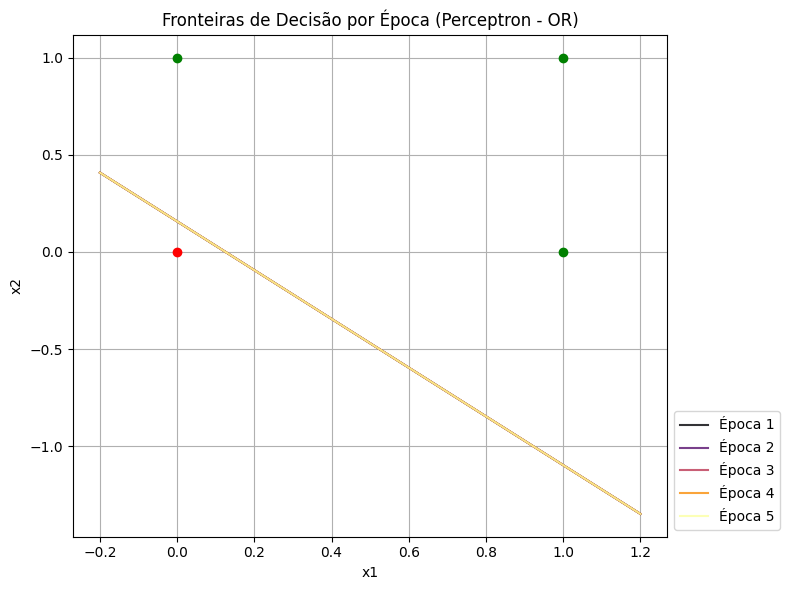

In [101]:
# Plot do gráfico com uma linha por época
plt.figure(figsize=(8,6))
cores = plt.cm.inferno(np.linspace(0, 1, len(historico_epocas)))
x_vals = np.linspace(-0.2, 1.2, 100)

for i, (w, b) in enumerate(historico_epocas):
    if w[1] != 0:
        y_vals = -(w[0] * x_vals + b) / w[1]
        plt.plot(x_vals, y_vals, color=cores[i], alpha=0.8, label=f"Época {i+1}")

# Pontos da base
for i in range(len(entradas)):
    cor = 'ro' if saidas[i] == 0 else 'go'
    plt.plot(entradas[i][0], entradas[i][1], cor)

plt.title("Fronteiras de Decisão por Época (Perceptron - OR)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

Pesos finais: [0.94733018 0.7552337 ]
Bias final: -0.11884419808197594


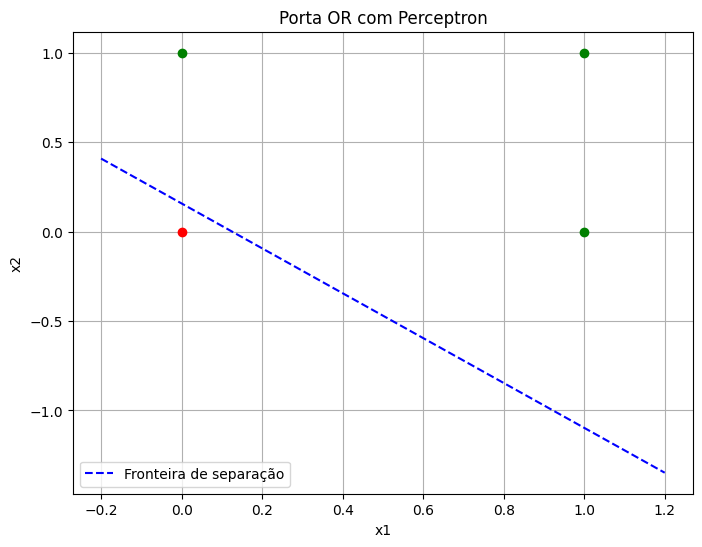

In [102]:
## Prints

print("Pesos finais:", pesos)
print("Bias final:", bias)

grafico_separacao(2)

Os gráficos de evolução das fronteiras de decisão ao longo das épocas mostram como o perceptron ajusta seus parâmetros gradualmente até encontrar uma reta que separa corretamente os dados.

Além disso, foi possível observar o impacto da taxa de aprendizado no número de épocas necessárias para convergir, evidenciando a importância de um bom balanceamento entre velocidade e estabilidade no treinamento do perceptron. Foram testados valores de 0.1 a 1.0 .


